# Modeling and Simulation in Python

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth orbit


In [2]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
year = UNITS.year

<Unit('year')>

In [3]:
# And an inition condition (with everything in SI units)

# distance from the sun to the earth at perihelion
x_0 = 147e9 * m

# initial velocity
vy_0 = -30300 * m/s

init = State(x = x_0,
             y = 0 * m,
             vx = 0 * m / s,
             vy = vy_0)

,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,-30300.0 meter / second


In [4]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

t_end = (1 * year).to_base_units()

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=t_end)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,31556925.9747 second


In [5]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    
    returns: Vector
    """
    x, y, vx, vy = state
    unpack(system)
    
    v = Vector(x, y)
    
    # make sure the result is a vector, either
    # by forcing it, or by putting v.hat() on
    # the left
    
    force = -G * m1 * m2 / v.mag2 * v.hat()
    return Vector(force)

    force = -v.hat() * G * m1 * m2 / v.mag2
    return force

In [6]:
universal_gravitation(init, system)

<Quantity([-3.6686486e+22 -0.0000000e+00], 'newton')>

In [7]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    

    F = universal_gravitation(state, system)
    A = F / m2
    
    return vx, vy, A.x, A.y

In [8]:
# Always test the slope function!

slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-30300.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [9]:
# Here's an event function that stops the simulation
# before the collision

def event_func(state, t, system):
    x, y, vx, vy = state
    v = Vector(x, y)
    return v.mag - system.r_final

In [10]:
# Always test the event function!

event_func(init, 0, system)

<Quantity(146298121000.0, 'meter')>

In [11]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
sol,None
t_events,[[]]
nfev,152
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [12]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [13]:
# Scaling the distances to million km

results.x /= 1e9
results.y /= 1e9

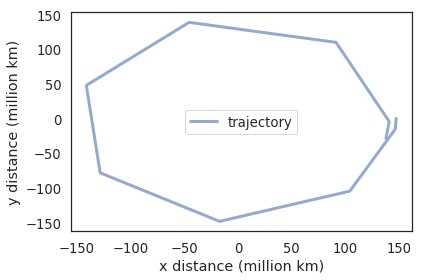

In [14]:
plot(results.x, results.y, label='trajectory')

decorate(xlabel='x distance (million km)',
         ylabel='y distance (million km)')

In [15]:
# Before plotting, we run the simulation again with `t_eval`

results, details = run_ode_solver(system, slope_func, events=event_func, method='RK23')
details

,values
sol,None
t_events,[[]]
nfev,137
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [16]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [17]:
# Scaling the distances to million km

results.x /= 1e9
results.y /= 1e9

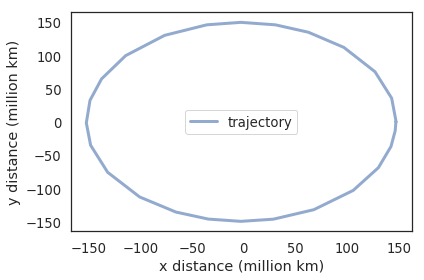

In [18]:
plot(results.x, results.y, label='trajectory')

decorate(xlabel='x distance (million km)',
         ylabel='y distance (million km)')

In [19]:
get_last_value(results)

array([ 1.47262303e+02,  7.08483175e-02,  1.32544305e+01, -3.02734326e+04])